In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuvatss","key":"d189c2ec0c1c5e34efabcb2669a55817"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
syncoraai/extrovert-vs-introvert-personality-traits-dataset  Extrovert vs. Introvert Personality Traits Dataset       24952  2025-06-24 12:24:19.087000            980        569  1.0              
syncoraai/synthetic-financial-dataset-by-syncora-ai          Synthetic Financial Dataset by Syncora.ai              6479170  2025-06-20 10:26:29.373000            781        523  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025      Electric Vehicle Specs Dataset (2025)                    16631  2025-06-20 07:14:56.777000           2213         58  1.0              
bismasajjad/glo

In [6]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [01:07<00:00, 219MB/s]
100% 5.20G/5.20G [01:07<00:00, 83.0MB/s]


In [7]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [9]:
pip install --upgrade datasets fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [10]:
import pandas as pd

df = pd.read_csv('HAM10000_metadata.csv')

print(df.to_string())

         lesion_id      image_id     dx    dx_type   age      sex     localization
0      HAM_0000118  ISIC_0027419    bkl      histo  80.0     male            scalp
1      HAM_0000118  ISIC_0025030    bkl      histo  80.0     male            scalp
2      HAM_0002730  ISIC_0026769    bkl      histo  80.0     male            scalp
3      HAM_0002730  ISIC_0025661    bkl      histo  80.0     male            scalp
4      HAM_0001466  ISIC_0031633    bkl      histo  75.0     male              ear
5      HAM_0001466  ISIC_0027850    bkl      histo  75.0     male              ear
6      HAM_0002761  ISIC_0029176    bkl      histo  60.0     male             face
7      HAM_0002761  ISIC_0029068    bkl      histo  60.0     male             face
8      HAM_0005132  ISIC_0025837    bkl      histo  70.0   female             back
9      HAM_0005132  ISIC_0025209    bkl      histo  70.0   female             back
10     HAM_0001396  ISIC_0025276    bkl      histo  55.0   female            trunk
11  

In [11]:
lesion_type_dict = {
    'nv': 'Melanocytic-nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign-keratosis-like-lesions',
    'bcc': 'Basal-cell-carcinoma',
    'akiec': 'Actinic-keratoses',
    'vasc': 'Vascular-lesions',
    'df': 'Dermatofibroma'
}

disease =[]
for i in range(len(df)):
    disease.append(lesion_type_dict[df.loc[i,"dx"]])

df['disease']=disease

In [12]:
import os
from pathlib import Path
data_dir = Path('images')
os.mkdir(data_dir)

for dis in list(lesion_type_dict.values()):
    path = str(data_dir) + "/" +dis
    os.mkdir(path)

In [13]:
import shutil

for i in range(len(df)):
    f= Path('HAM10000_images_part_1/' + df.loc[i,"image_id"] +'.jpg')
    if os.path.isfile(f):
        shutil.copy(f, Path('images/' + df.loc[i,"disease"]))
    else:
        shutil.copy(Path('HAM10000_images_part_2/' + df.loc[i,"image_id"] +'.jpg'), Path('images/' + df.loc[i,"disease"]))
    if i%1000==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [14]:
!pip install -q datasets transformers
import torch
from torch import nn
from collections import Counter
from transformers import Trainer, TrainingArguments, AutoFeatureExtractor, AutoModelForImageClassification

In [15]:
from huggingface_hub import notebook_login

notebook_login()

In [16]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [17]:
from datasets import load_dataset

In [18]:
#from pathlib import Path
#data_dir = Path('images')
#dataset = ImageFolder(data_dir)
ds = load_dataset("imagefolder", data_dir=data_dir)

Resolving data files:   0%|          | 0/10015 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [19]:
import torch
from torch import nn
from transformers import Trainer # Ensure Trainer is imported from transformers

class WeightedLossTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        if class_weights is not None:
            if not isinstance(class_weights, torch.Tensor):
                raise TypeError("class_weights must be a torch.Tensor")
        self.class_weights = class_weights

    # Modified compute_loss to accept num_items_in_batch
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=0):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        if self.class_weights is not None:
            self.class_weights = self.class_weights.to(logits.device)

        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

In [20]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10015
    })
})

In [21]:
example = ds["train"][10]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'label': 0}

In [22]:
ds["train"].features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['Actinic-keratoses', 'Basal-cell-carcinoma', 'Benign-keratosis-like-lesions', 'Dermatofibroma', 'Melanocytic-nevi', 'Melanoma', 'Vascular-lesions'], id=None)}

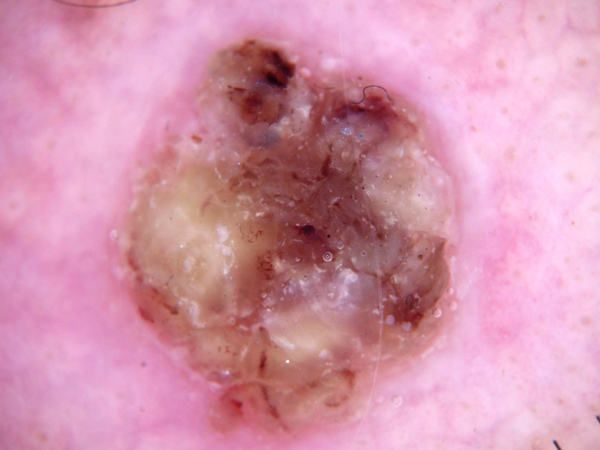

In [23]:
example['image']

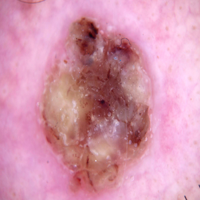

In [24]:
example['image'].resize((200, 200))

In [25]:
example['label']

0

In [26]:
ds["train"].features["label"]

ClassLabel(names=['Actinic-keratoses', 'Basal-cell-carcinoma', 'Benign-keratosis-like-lesions', 'Dermatofibroma', 'Melanocytic-nevi', 'Melanoma', 'Vascular-lesions'], id=None)

In [27]:
labels = ds["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'Benign-keratosis-like-lesions'

In [28]:
model_checkpoint = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model from which to fine-tune
batch_size = 32 # batch size for training and evaluation

In [29]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
feature_extractor

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [30]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

# --- Start of the fix ---

# Assuming feature_extractor.size is a dictionary like {'height': 224, 'width': 224}
# We extract the integer value. Since height and width are usually the same for these models,
# we can pick one. If they could be different, you'd use a tuple.
try:
    # Most common case for modern transformers
    size = (feature_extractor.size["height"], feature_extractor.size["width"])
except TypeError:
    # For older models or different configurations, size might be an int directly
    # or a dictionary with a single 'shortest_edge' key.
    size = feature_extractor.size["shortest_edge"]
except KeyError:
    # A common fallback if the keys are just 'size'
    size = feature_extractor.size['size']


# --- End of the fix ---


normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

train_transforms = Compose(
        [
            RandomResizedCrop(size), # Use the extracted size
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(size), # Use the extracted size
            CenterCrop(size), # Use the extracted size
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [31]:
# split up training into training + validation
splits = ds["train"].train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

In [32]:
train_labels = [example['label'] for example in train_ds]

class_counts = Counter(train_labels)

num_classes = len(ds["train"].features['label'].names)

sorted_class_counts = [class_counts[i] for i in range(num_classes)]

weights = [1.0 / count for count in sorted_class_counts]

weights_sum = sum(weights)
class_weights_list = [w / weights_sum * num_classes for w in weights]

class_weights_tensor = torch.tensor(class_weights_list, dtype=torch.float)

print("Calculated Class Weights:", class_weights_tensor)

Calculated Class Weights: tensor([0.9552, 0.6019, 0.2827, 2.6157, 0.0465, 0.2768, 2.2212])


In [33]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [34]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'label': 4,
 'pixel_values': tensor([[[ 1.7523,  1.8037,  1.8037,  ...,  2.0605,  2.0605,  2.0092],
          [ 1.8037,  1.8550,  1.7865,  ...,  2.0605,  2.0777,  2.1119],
          [ 1.7180,  1.8208,  1.7865,  ...,  2.0605,  2.0605,  2.0948],
          ...,
          [ 1.0673,  1.0844,  1.0844,  ...,  1.8550,  1.8208,  1.8037],
          [ 1.1700,  1.1529,  1.1700,  ...,  1.8722,  1.8722,  1.8550],
          [ 1.1700,  1.1529,  1.1700,  ...,  1.8893,  1.8893,  1.9235]],
 
         [[ 0.0651,  0.0301, -0.0574,  ...,  0.7129,  0.6954,  0.6429],
          [-0.0399, -0.0224, -0.0749,  ...,  0.6604,  0.6429,  0.6604],
          [ 0.0126,  0.0826,  0.0301,  ...,  0.6604,  0.6429,  0.6779],
          ...,
          [-0.9328, -0.8978, -0.8627,  ...,  0.4328,  0.4153,  0.3978],
          [-0.8277, -0.7927, -0.7577,  ...,  0.4503,  0.4328,  0.4153],
          [-0.8102, -0.8277, -0.8102,  ...,  0.4853,  0.4678,  0.4853]]

In [35]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
model_name = model_checkpoint.split("/")[-1]

# from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./skin-cancer-model",
    per_device_train_batch_size=16,
    eval_strategy="steps",
    num_train_epochs=4,
    fp16=True,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=True,
    report_to='tensorboard',
    load_best_model_at_end=True,
    # Add this line
    metric_for_best_model="f1_macro",  # Or "f1_weighted"
)

In [37]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.7 MB/s eta 0:00:00


In [38]:
# import evaluate

# metric = evaluate.load("accuracy")

In [40]:
import numpy as np
from sklearn.metrics import f1_score
import evaluate # Import the evaluate library

# Load the accuracy metric using evaluate.load
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    # Calculate accuracy using the loaded 'metric' object
    acc = metric.compute(predictions=predictions, references=labels)

    # Calculate F1 scores
    f1_macro = f1_score(y_true=labels, y_pred=predictions, average='macro')
    f1_weighted = f1_score(y_true=labels, y_pred=predictions, average='weighted')

    # Return a dictionary of all your metrics
    return {
        'accuracy': acc['accuracy'],
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
    }

In [41]:
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [44]:
trainer = WeightedLossTrainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    processing_class=feature_extractor, # Changed from 'tokenizer'
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    class_weights=class_weights_tensor, # Added class_weights
)

In [45]:
train_results = trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: himanshu2004vats (himanshu2004vats-delhi-technological-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted
1,1.229600,1.205850,0.520958,0.389028,0.594136
2,0.817300,0.790693,0.595808,0.558652,0.646051
3,0.681300,0.553090,0.733533,0.636670,0.762049
4,0.615100,0.516016,0.755489,0.725975,0.778391
5,0.562100,0.562290,0.809381,0.684605,0.813966
6,0.421000,0.438499,0.823353,0.733920,0.834279
7,0.376000,0.441597,0.836327,0.778340,0.842860
8,0.328500,0.422839,0.846307,0.773355,0.850616
9,0.322500,0.401691,0.820359,0.769406,0.832363
10,0.307100,0.382354,0.846307,0.787948,0.852872


In [46]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Uploading...:   0%|          | 0.00/110M [00:00<?, ?B/s]

***** train metrics *****
  epoch                    =         10.0
  total_flos               = 2086705788GF
  train_loss               =        0.617
  train_runtime            =   0:28:47.25
  train_samples_per_second =       52.181
  train_steps_per_second   =        0.411


In [47]:
metrics = trainer.evaluate()

trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.8463
  eval_f1_macro           =     0.7734
  eval_f1_weighted        =     0.8506
  eval_loss               =     0.4228
  eval_runtime            = 0:00:11.81
  eval_samples_per_second =     84.814
  eval_steps_per_second   =      2.709


In [ ]:
`print(args.output_dir)

swin-tiny-patch4-window7-224-finetuned-skin-cancer


In [ ]:
import os

# Get the directory where your TrainingArguments are configured to save outputs
# This is usually the first argument you passed to TrainingArguments
output_directory = "swin-tiny-patch4-window7-224-finetuned-skin-cancer"

# Define a specific path for your final saved model
# This will create a folder named 'final_model' inside your output_directory
final_model_save_path = os.path.join(output_directory, "final_model")

# Use the trainer's save_model method to save the model and its configuration
trainer.save_model(final_model_save_path)

print(f"Your model has been successfully saved to: {final_model_save_path}")

Uploading...:   0%|          | 0.00/221M [00:00<?, ?B/s]

Your model has been successfully saved to: swin-tiny-patch4-window7-224-finetuned-skin-cancer/final_model
